## Inteligência Artificial / UFPB
Aluno: Bruno Soares de oliveira lopes. <br>
Matricula:20200136697 <br>
Dataset: <a href="https://www.kaggle.com/datasets/rodrigoriboldi/incidentes-de-segurana-da-informao-no-brasil">Incidentes de Segurança da Informação no Brasil</a>


**1)** Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um. <br>

(A) Agente comentarista de jogo - CSGO. <br> <br>
(B) Agente sugestor de vinho. <br> <br>
(C) Agente treinador de time - E-sport.

|Agente| Medida de Desempenho | Ambiente | Atuadores | Sensores |
| :- | :- | :- | :- | :- |
| (A) | Passar informações das melhores jogadas, detalhar jogadas do MPV(melhor player do campeonato) de forma correta.  | Qual melhor mapa do game, atualizações sobre futuras mudanças no jogo, clutch(jogadas épicas) dos jogados | Dados do MVP do campeonato, reação dos jogadores ao ganhar o campeonato. | Movimentos do jogo, habilidades dos players em curto tempo, estatregia de jogo da equipe. |
| (B) | Oferecer o melhor vinho considerando as caracteristicas do ambiente ou ambiente desejado pelo cliente. | Restaurantes, Feira de vinhos, Bares. | Informar os tipos de vinhos, regiões de produção, produtores e valores. | Degustação dos vinhos, Observação do teor alcoólico. |
| (C) | Analisar a melhor tática dos jogadores, identificar melhor resultado positivo e negativo em partidas. | GH (Game House), campeonatos | Apresentar melhor jogada Solo, orientar sobre melhores jogadas e piores jogadas realizadas, informar qual foi o melhor mapa que o time ja jogou nos ultimos jogos. | Sensor visual, analise por monitor, comunicação do time em conjunto. |

**2)** Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base. 

>> Aprendizado supervisionado
 - A partir de um metodo de classificação, é passado para uma máquina uma base de dados com informações, e passado os valores certos e errados por um humano e em seguida a serem comparadas pela máquina, e só assim dar uma resposta a partir dos dados que ela recebeu.
 - A base proposta coletada no Kaggle é de um dataset de incidentes de segurança registradas no Brasil, onde apresenta números de casos e os principais casos de incidentes. 

>> Aprendizado não-supervisionado
 - Diferente do supervisionado, o não-supervisionado age por si só, não lhe é passado exemplos rotulados, nesse método de aprendizagem a máquina informa seus resultados de forma independente.
 - Por ser uma tecnica de redução de dimensionalidade, é possivel que a máquina consiga a informação sobre o maior opressor dos incidentes, de acordo com o conjunto de dados desconhecido.

>> Aprendizado semi-supervisionado
 - Como o nome diz, Aprendizado semi-supervisionado os dados são parcialmente rotulados. Utilizado quando existe uma maior quantidade de dados não classificados em um conjunto menor rotulados. Empregado quando o custo de rotular dados é elevado.
 - pode ser usado para estimar pelo numero de registro de falhas de segurança por um conjunto de dados.

>>Aprendizado por reforço
 - Aprendizado que utiliza a lógica de tentativa e erro, e assim o próprio sistema aprende quais são as possíveis melhores ações a serem tomadas.
 - No caso da Base de incidências de falhas, é possivel identificar erros, comparando com as experiência anteriores, assim classificando futuras falhas com mais eficiência.

**3)** Em um Jupyter Notebook (link do collab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação: <br>

**Dependencias**

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

**DATASET**

In [115]:
def Read_CSV(arquivo):
    leitura = pd.read_csv(arquivo, encoding='utf-8', sep=';' )
    return leitura

In [116]:

DATA = Read_CSV('cert_2010-2019.csv')
DATA.head()

,Ano,Mes,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
0,2019,Janeiro,62481,7796,4191,19,2594,46038,1744,99
1,2019,Fevereiro,70069,7707,2192,27,4179,54401,1459,104
2,2019,Março,85409,4476,29309,19,2006,47966,1521,112
3,2019,Abril,59900,7624,2718,37,1555,45774,2119,73
4,2019,Maio,52129,6555,15773,74,1425,25521,2633,148


**Pré-processamento dos dados**

In [117]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ano      120 non-null    int64 
 1   Mes      120 non-null    object
 2   Total    120 non-null    int64 
 3   Worm     120 non-null    int64 
 4   DOS      120 non-null    int64 
 5   Invasao  120 non-null    int64 
 6   Web      120 non-null    int64 
 7   Scan     120 non-null    int64 
 8   Fraude   120 non-null    int64 
 9   Outros   120 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 9.5+ KB


**Identificando os valores numericos**

In [118]:
DATA.isnull().sum()

Ano        0
Mes        0
Total      0
Worm       0
DOS        0
Invasao    0
Web        0
Scan       0
Fraude     0
Outros     0
dtype: int64

**Identificado que a base não tem valores NULL** <br>
**Realizando um filtro com objetivo de trabalhar os valores numéricos**

In [119]:
DATA_AUX = DATA.copy()
DATA_AUX = DATA_AUX.drop(["Mes","Ano"],axis=1)
DATA_AUX.describe()

,Total,Worm,DOS,Invasao,Web,Scan,Fraude,Outros
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,51360.641667,3448.166667,8261.991667,265.675000,2855.583333,24064.991667,9184.675000,3279.558333
std,38427.807026,2357.209104,27204.101583,391.464524,2396.054371,13109.143640,17528.364123,6239.560820
min,8223.000000,865.000000,0.000000,1.000000,402.000000,2920.000000,1459.000000,30.000000
25%,30145.500000,1836.250000,13.000000,22.750000,1329.750000,13255.000000,3294.250000,240.750000
50%,47623.000000,2862.000000,210.500000,103.500000,2001.500000,23249.500000,5324.000000,1141.500000
75%,58682.250000,4146.500000,5955.750000,374.500000,3534.250000,32565.750000,7815.750000,3489.750000
max,257618.000000,12871.000000,207780.000000,2149.000000,12169.000000,60890.000000,130108.000000,32746.000000


>**3.1)** Aplique processos de pré-processamento e os necessários para execução do método K-NN. 

In [120]:
## pré-Processamento dos dados
## Definição de preprocessamento em atributo

x = DATA_AUX.drop(["DOS"], axis = 1)
y = DATA_AUX.loc[:, "DOS"]

x = OrdinalEncoder().fit_transform(x)

> Divisão de dados para treinamento e teste sendo 20% para validação e 80% para treinamento.

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1)

>**3.2)** Aplique correlação ou PCA e selecione um número menor de atributos com esses métodos e justifique sua decisão. 

Correlação

<AxesSubplot:>

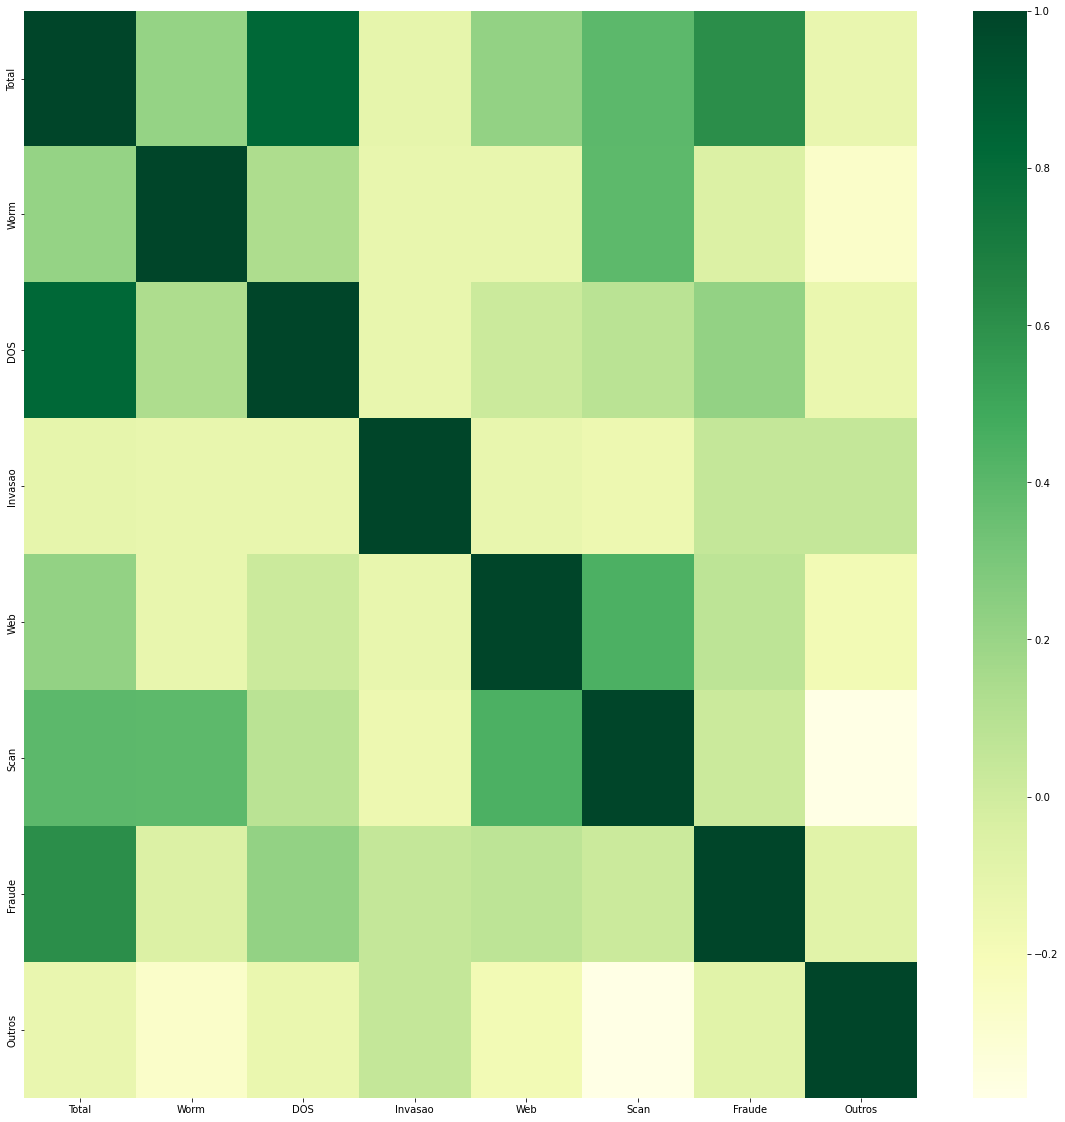

In [122]:
plt.figure(figsize = (20, 20))

sns.heatmap(DATA_AUX.corr(), cmap = "YlGn")

>Para reduzir a quantidade de atributos, consideramos os 2 que não apresenta um valor descritivo bem representativo, dessa forma foi removido os atributos **Total** e **Outros**.

In [123]:
corr_matrix = DATA_AUX.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.50)]

In [124]:
to_drop

['DOS', 'Fraude']

In [125]:
Att = ['Total', 'Outros']

DATA_REDU = DATA_AUX.drop(DATA_AUX[Att], axis = 1)
DATA_REDU.head()

,Worm,DOS,Invasao,Web,Scan,Fraude
0,7796,4191,19,2594,46038,1744
1,7707,2192,27,4179,54401,1459
2,4476,29309,19,2006,47966,1521
3,7624,2718,37,1555,45774,2119
4,6555,15773,74,1425,25521,2633


**PCA** Normalizar dados e atributo alvo:

In [126]:

x = DATA_REDU.drop(["DOS"], axis = 1)
y = DATA_REDU.loc[:, "DOS"]

x = OrdinalEncoder().fit_transform(x)
x

array([[112.,  14.,  78., 111.,   2.],
       [111.,  19.,  93., 116.,   0.],
       [ 93.,  14.,  60., 113.,   1.],
       [110.,  23.,  44., 110.,   5.],
       [104.,  35.,  36.,  63.,  18.],
       [105.,  31.,  30.,  45.,   7.],
       [113.,  19.,  29.,  84.,  24.],
       [117.,  30.,  45., 102.,  50.],
       [115.,  20.,  56.,  69.,  60.],
       [116.,  27.,  70.,  66.,  69.],
       [107.,  36.,   3.,  49.,  68.],
       [118.,  34.,  48.,  67.,  29.],
       [102.,  37.,  91.,  93.,   3.],
       [ 32.,  40.,  66.,  74.,  10.],
       [ 46.,  24.,  63.,  70.,  40.],
       [ 48.,  62.,  77., 112.,  70.],
       [ 65.,  59.,  68.,  83.,  19.],
       [ 97.,  52.,  55.,  47.,  22.],
       [ 64.,  43.,  99., 114.,  34.],
       [  3.,  32., 102.,  61.,  35.],
       [ 55.,  21.,  67.,  80.,  42.],
       [ 94.,  28.,  87.,  99.,  27.],
       [ 61.,  49., 108.,  85.,   6.],
       [ 81.,   9.,  89., 100.,  12.],
       [  8.,  33., 118., 109.,  61.],
       [ 22.,  22.,  95.,

PCA aplicado em **3** componentes principais:

In [127]:
PCA_3 = PCA(n_components = 3)

componentes = PCA_3.fit_transform(x)
data_pca_5 = pd.DataFrame(componentes, columns = ["PCA1","PCA2","PCA3"])
data_pca_5["DOS"] = y

data_pca_5

,PCA1,PCA2,PCA3,DOS
0,-22.653055,95.771542,-9.217075,4191
1,-33.676318,97.521670,0.033650,2192
2,-6.821498,87.592830,-4.900704,29309
3,-7.418841,84.159968,-30.034025,2718
4,14.788338,46.702981,-40.925339,15773
...,...,...,...,...
115,92.899030,7.610723,15.445979,4
116,102.641427,-0.299971,20.247549,0
117,96.711954,11.174137,3.685259,1
118,101.184434,6.531816,21.081474,157


**3.3)** Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados. 

> Aplicando o KNN para 5 valores => K: 1, 5, 9

In [128]:
LISTA_K = [1,5,9]

KNN_LISTA = []

for k in LISTA_K:
    KNN_LISTA.append(KNeighborsClassifier(n_neighbors = k))

for knn in KNN_LISTA:
    knn.fit(x_train, y_train)

In [129]:
Resultado_Lista = []

for knn in KNN_LISTA:
    Resultado_Lista.append(knn.predict(x_test))

**Acurácia dos dados**

In [130]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')

1-NN
Acurácia: 0.08333
5-NN
Acurácia: 0.04167
9-NN
Acurácia: 0.04167


> A acuraria dos dados, é usado pra classificar a veracidade dos dados. Pode observar que quando o numero  **k** muda de 1 para 9 o classificador diminue, apresentando valores não satisfatórios. 

**Precisão dos dados**

In [131]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")

1-NN
Precisão: 0.03846
5-NN
Precisão: 0.00806
9-NN
Precisão: 0.00617


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> A precisão dos dados calcula a incidencia previu a falhas, o quanto os dados estão corretos. 

**Matriz de confusão**

In [132]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')

1-NN
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
5-NN
Matriz de Confusão:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

É observado através da matriz de confusão: <br>
**Verdadeiros Negativos** amplia o incremento de K.<br>
**Verdadeiros Positivos** amplia  o incremento de K.<br>
**Falsos Positivos** reduz o incremento de K.<br>
**Falsos Negativos** reduz o incremento de K.<br>

Com essa relação é podemos inferir que o modelo propende a classificar em maior quantidade instâncias como verdadeiras e em baixa quantidade instâncias como falsas com o aumento de K. <br>

<center>

|||
| :- | :- |
| VN | FP |
| FN | VP |

<center>
<br>
Podemos ver que a Base de dados é desbalanceada, visto que algumas falhas não tem muita relção com outras, fazendo assim com que o classificador tenha uma representação com pontos distantes.

**Sensibilidade**

In [133]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f"Precisão: {metrics.recall_score(y_test, result, average='macro'):.5f}")

1-NN
Precisão: 0.02564
5-NN
Precisão: 0.01613
9-NN
Precisão: 0.01852


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A sensibilidade é definida como um aferidor do caso onde a falha maior foi a **DOS**.

**3.4)** Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados. 

> Para analise dos casos foi estudado as metricas no site:
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics">Métricas e pontuação: quantificando a qualidade das previsões </a>


In [134]:
##chebyshev
KNN = KNeighborsClassifier(n_neighbors = 3, metric = "chebyshev")
KNN.fit(x_train, y_train)
result = KNN.predict(x_test)


print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')
print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")
print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')
print(f"Sensibilidade: {metrics.recall_score(y_test, result, average='macro'):.5f}")


Acurácia: 0.04167
Precisão: 0.02857
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sensibilidade: 0.01429


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
##manhattan
KNN = KNeighborsClassifier(n_neighbors = 3, metric = "manhattan")
KNN.fit(x_train, y_train)
result = KNN.predict(x_test)


print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')
print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")
print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')
print(f"Sensibilidade: {metrics.recall_score(y_test, result, average='macro'):.5f}")


Acurácia: 0.08333
Precisão: 0.04040
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sensibilidade: 0.03030


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Com a metrica **manhattan** Podemos perceber que houve uma mudança nas metricas de Acurácia e Precisão em relação as outras.

**3.5)** Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

O melhor K na analise foi o K=1 e utilizar a matrica ***manhattan***

In [136]:
x = DATA_AUX.drop(["DOS"], axis = 1)
y = DATA_AUX.loc[:, "DOS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1)

KNN = KNeighborsClassifier(n_neighbors = 1, metric = "manhattan")
KNN.fit(x_train, y_train)
result = KNN.predict(x_test)

In [137]:
print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')
print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")
print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')
print(f"Sensibilidade: {metrics.recall_score(y_test, result, average='macro'):.5f}")

Acurácia: 0.08333
Precisão: 0.05263
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Sensibilidade: 0.03947


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observamos que ao Aplicar apenas 1 componente tivemos uma melhora em relação as outras metricas, numero superior da Acurácia, e na precisão dos dados.
A matriz de confusão teve uma variação maior, é possivel ver mais representações graficas.


**4)** Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

In [138]:
##Dependências
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.integrate import trapz

In [139]:
def sensi(fruta: dict[str, int]): ## sensi - VP / (VP + FN)
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def especi(fruta: dict[str, int]): ## Especi - VN / (VN + FP)
  return fruta["vn"] / (fruta["vn"] + fruta["fp"])

def precisao(fruta: dict[str, int]): ## Precisão - VP / (VP + FP)
  return fruta["vp"] / (fruta["vp"] + fruta["fp"])

def f1(precisao, sensi): ## F1 = (2 * Precisão * sensi) / (Precisão + sensi)
  return (2 * precisao * sensi) / (precisao + sensi)

def acuracia(fruta: dict[str, int]): ## Acurácia = (VN + VP) / (VP + FN + VN + FP)
  return (fruta["vn"] + fruta["vp"]) / (fruta["vp"] + fruta["fn"] + fruta["vn"] + fruta["fp"])   

def phi(fruta: dict[str, int]):  ## Coeficiente de Correlação de Matthews (phi) = (VP * VN – FP * FN) / sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))
  return (((fruta["vp"] * fruta["vn"]) - (fruta["fp"] + fruta["fn"])) / math.sqrt((fruta["vp"] + fruta["fp"]) * (fruta["vp"] + fruta["fn"]) * (fruta["vn"] + fruta["fp"]) * (fruta["vn"] + fruta["fn"])))

def tpr(fruta: dict[str, int]): ## True Positive Rate - Taxa de Verdadeiro Positivo = (VP / (VP + FN))
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def fpr(fruta: dict[str, int]): ## False Positive Rate - Taxa de Falso Positivo = (FP / (VN + FP))
  return fruta["fp"] / (fruta["vn"] + fruta["fp"])

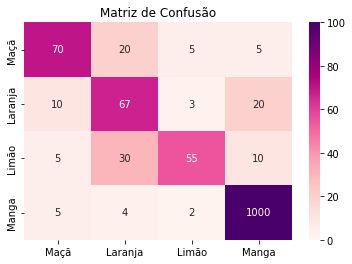

In [140]:
mat_confu = np.array([[70, 20, 5, 5], [10, 67, 3, 20], [5, 30, 55, 10], [5, 4, 2, 1000]])
dataframe_MC = pd.DataFrame(mat_confu, index = ['Maçã', 'Laranja', 'Limão', 'Manga'], columns = ['Maçã', 'Laranja', 'Limão', 'Manga'])

res = sn.heatmap(dataframe_MC, annot = True, vmin = 0.0, vmax = 100.0, cmap = plt.cm.RdPu, fmt = 'g')
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Maçã', 'Laranja', 'Limão', 'Manga'], va = 'center')
plt.title('Matriz de Confusão')
plt.show()

**Analise da Matriz de Confusão**

In [141]:
#Analise da Diagonal Principal
#identificação dos VPs
#Divisão dos VN, VP, FN, FP
maca = {"vp":70, "fp":(30), "fn":(20), "vn":(1125)}
laranja = {"vp":67, "fp":(33), "fn":(54), "vn":(1125)}
limao = {"vp":55, "fp":(45), "fn":(10), "vn":(1137)}
manga = {"vp":1000, "fp":(11), "fn":(35), "vn":(192)}

In [142]:
# Calculo das Métricas
Sensibilidade = (sensi(maca) + sensi(laranja) + sensi(limao) + sensi(manga)) / 4
especificidade = (especi(maca) + especi(laranja) + especi(limao) + especi(manga)) / 4
Precisao = (precisao(maca) + precisao(laranja) + precisao(limao) + precisao(manga)) / 4 
f1 = f1(Precisao, Sensibilidade)
acuracia = (acuracia(maca) + acuracia(laranja) + acuracia(limao) + acuracia(manga)) / 4 
phi = (phi(maca) + phi(laranja) + phi(limao) + phi(manga)) / 4 
# ROC - AUC
tpr = (tpr(maca) + tpr(laranja) + tpr(limao) + tpr(manga)) / 4 
fpr = (fpr(maca) + fpr(laranja) + fpr(limao) + fpr(manga)) / 4 

In [143]:

Metricas = ['Sensibilidade','Especificidade','Precisão','F1','Acurácia','Coeficiente de Matthews']
Func = [Sensibilidade,especificidade,Precisao,f1,acuracia,phi]
for Met,Fun in zip( Metricas,Func):
    print('{} -> {:.2f}'.format(Met,Fun))


Sensibilidade -> 0.79
Especificidade -> 0.96
Precisão -> 0.73
F1 -> 0.76
Acurácia -> 0.95
Coeficiente de Matthews -> 0.71


##### AUC

In [144]:
Metricas = ['verdadeiro positivo','falso positivo']
Func = [tpr,fpr]
for Met,Fun in zip( Metricas,Func):
    print('{} -> {:.2f}'.format(Met,Fun))


verdadeiro positivo -> 0.79
falso positivo -> 0.04


In [145]:
y = (0, tpr, 1)
x = (0, fpr, 1)
auc = trapz(y, x)
print('Área sob a curva - AUC = {:.2f}'.format(auc))

Área sob a curva - AUC = 0.87


> **Como você resolveria o problema dessa base de dados observando as métricas de avaliação?**
 - Analisando a base de dados e as métricas é possivel identificar um desbalançeamento dos dados, assim fazendo com que as informações tomem um rumo imparcial. assim com o objetivo de balancear as informações são utilizados tecnicas de clusterização assim gerando sub amostras e realizando outro dimensionamento das informações.

**5)** Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.

>> Uma Inteligência Artificial pode tratar um ser humano com preconceito?


    Uma IA é desenvolvida a partir de uma base de informações no qual vai ser fortalezida em experiências de acordo com as interações e combinações que ela é aplicada. Assim é muito importante tomar cuidado em quais métricas serão utilizadas para que a máquina consiga consumir informações que garanta a melhor experência possivel.
    Em ambientes onde a base de informações coletadas pela IA seja influenciado por preconceitos, e comportamentos tendencioso vai fazer com que a máquina tome essas ações como as corretas e assim sendo replicadas e assim proporcionando situações não esperadas.
    Realizar procedimentos de filtro é essencial para que a malha de interação da IA com o ambiente seja o mais eficiente possível.

